In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import os
from toolz import pipe
import pandas as pd

from support_functions import *
from micropattern_analysis import *

# Analysis of MPs from Polina's fate experiment

In [3]:
dir = r"D:\OneDrive - Universität Wien\Adameyko Lab\FS9_Polina_Analysis\images"
os.chdir(dir)
dirs = os.listdir(".")
print(dirs)

['all_fates_pax6', 'neural_crest_pax6', 'neural_crest_six1', 'neural_plate_pax6', 'neural_plate_six1', 'placode_pax6', 'placode_six1']


In [4]:
file_names, images = zip(*get_files_and_images(dirs).items())

In [5]:
file_names = list(file_names)
images = list(images)

## Image Preprocessing

### All fates images (PAX6)

In [7]:
cur_images = images[0:3]
cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    cur_images[0:3]
))
cur_images.append(images[3])

IndexError: index 3 is out of bounds for axis 0 with size 3

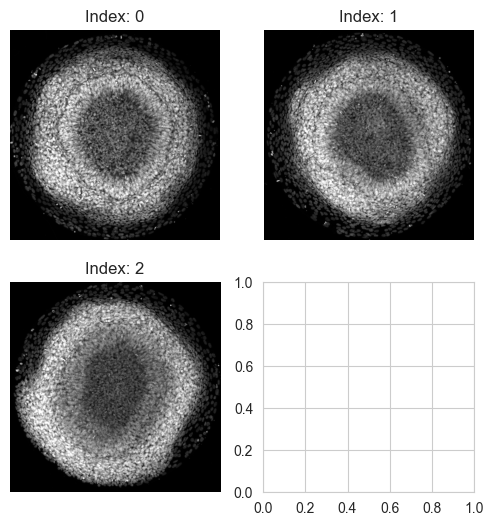

In [8]:
channel = 3
fig, ax = plot_images(cur_images, channel, fig_size=(6, 6))

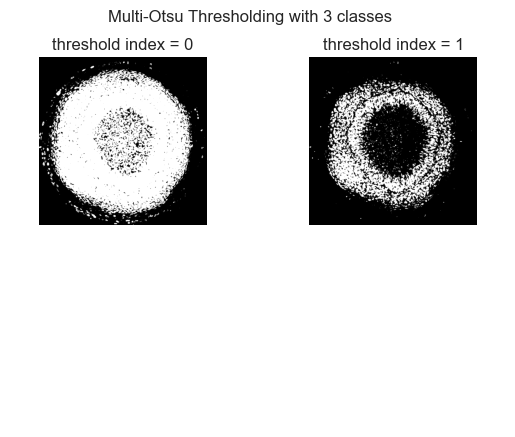

In [9]:
plot_multi_otsu_thresholds(cur_images[0], channel, 3)

In [10]:
del cur_images[-1]

dapi_num = 3

images_new = list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3),
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3)
    ),
    cur_images)
)

file_names_new = file_names[0:3]

### Neural crest fate images (PAX6)

In [11]:
cur_file_indexes = string_list_locations(file_names, "neural_crest_pax6")

cur_images = get_items_from_index(images, cur_file_indexes)
cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    cur_images
))

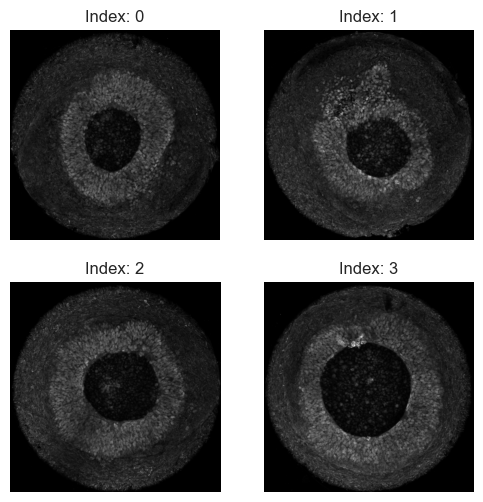

In [12]:
channel = 2
fig, ax = plot_images(cur_images, channel, fig_size=(6, 6))

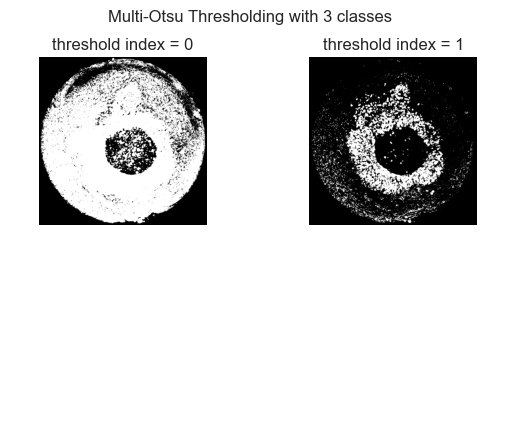

In [13]:
plot_multi_otsu_thresholds(cur_images[1], channel, 3)

In [14]:
del [cur_images[0], cur_images[2], cur_file_indexes[0], cur_file_indexes[2]]

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        #   lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   ^ channel above only background, so no threshold
        lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

### Neural crest fate images (SIX1)

In [15]:
cur_file_indexes = string_list_locations(file_names, "neural_crest_six1")
cur_images = get_items_from_index(images, cur_file_indexes)
cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    cur_images
))

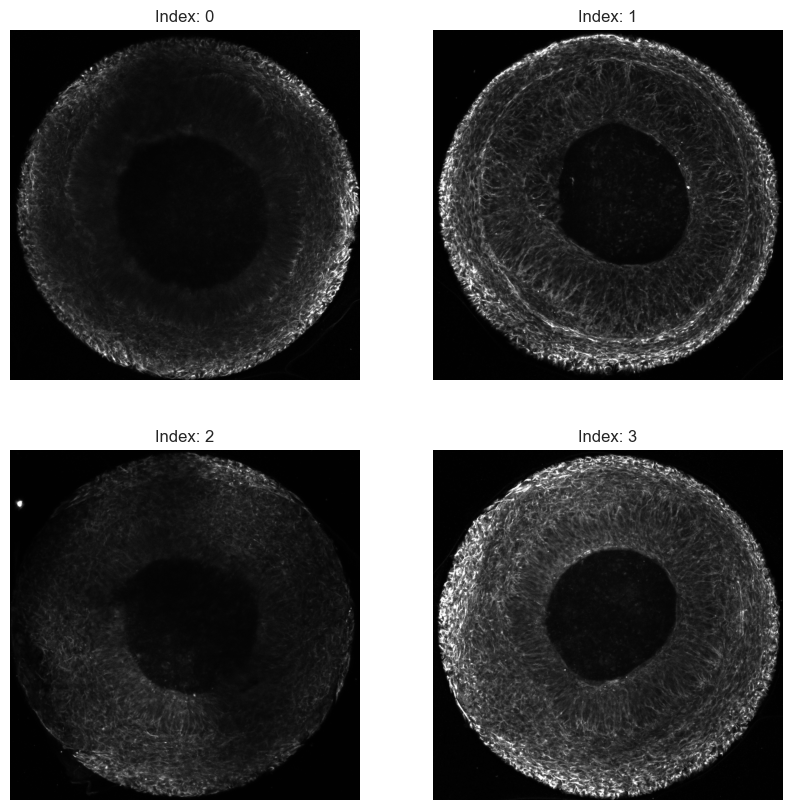

In [16]:
channel = 2
fig, ax = plot_images(cur_images, channel)

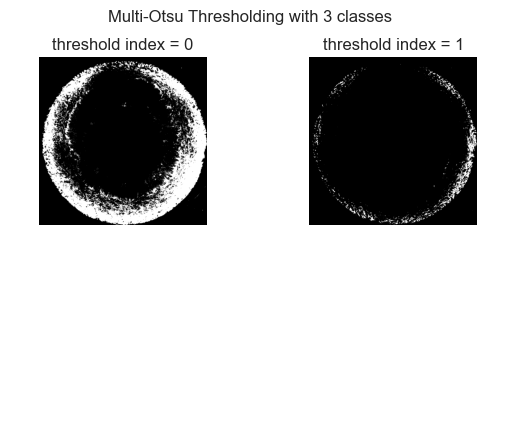

In [17]:
plot_multi_otsu_thresholds(cur_images[0], channel, 3)

In [18]:
del [cur_images[2], cur_file_indexes[2]]

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        #   lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   ^ channel above only background, so no threshold
        lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3, threshold_index=0)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

### Neural plate fate images (PAX6)

In [19]:
cur_file_indexes = string_list_locations(file_names, "neural_plate_pax6")
cur_images = get_items_from_index(images, cur_file_indexes)
cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    cur_images
))

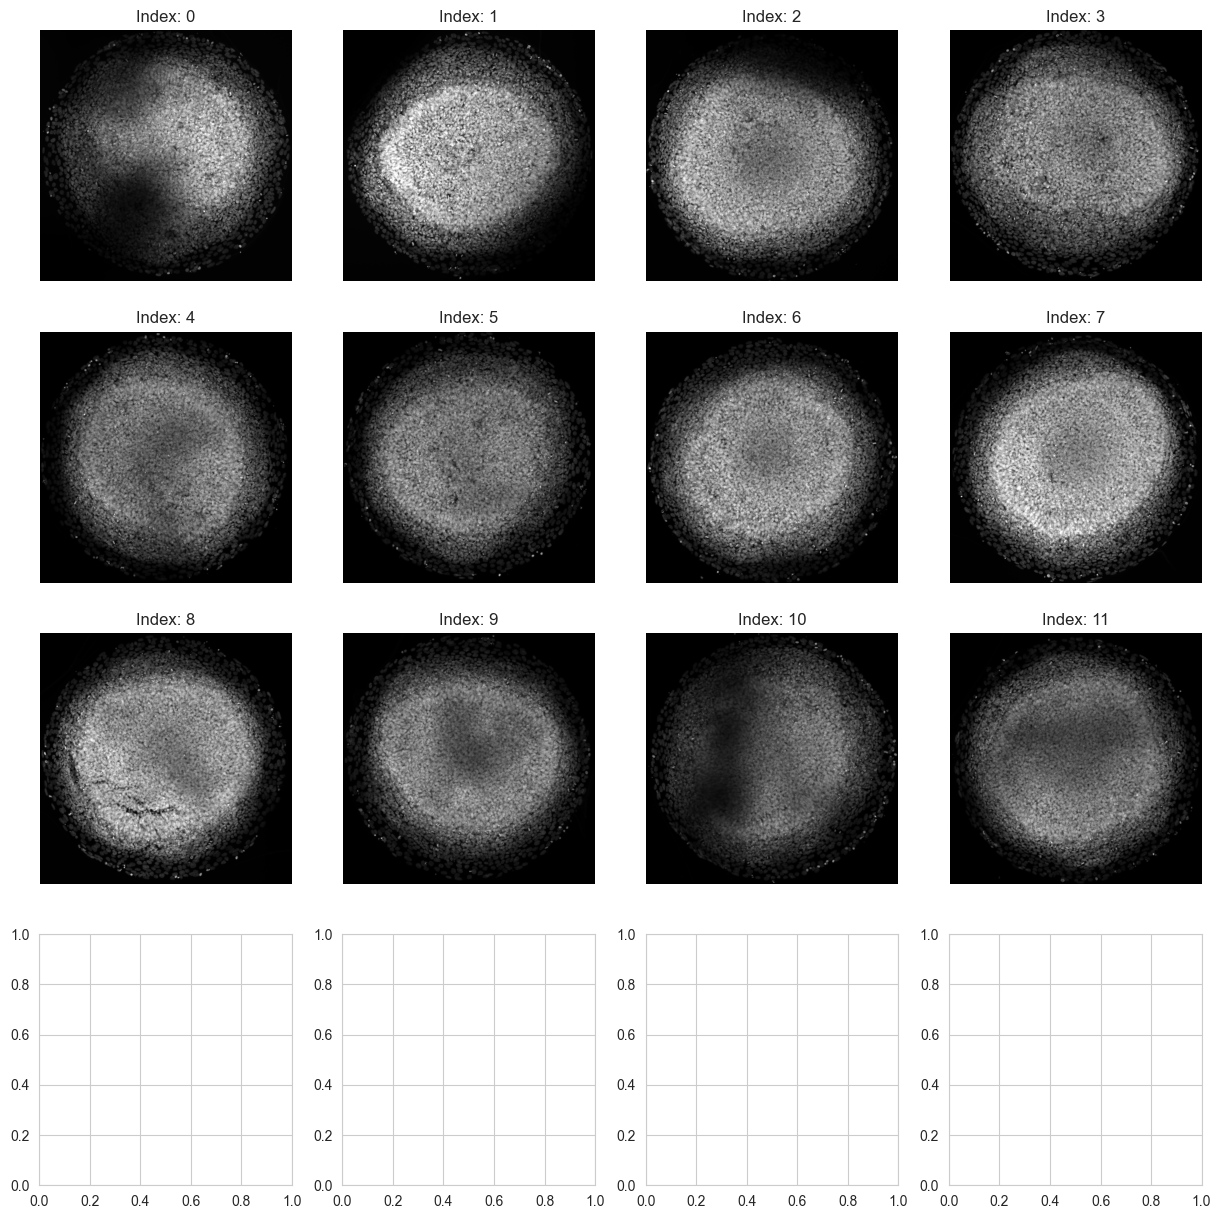

In [20]:
channel = 3
fig, ax = plot_images(cur_images, channel, fig_size=(15, 15))

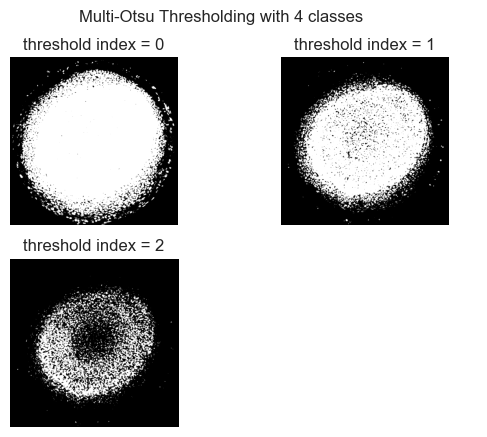

In [21]:
plot_multi_otsu_thresholds(cur_images[7], channel, 4)

In [22]:
index_to_exclude = [0, 2, 10]
cur_images = delete_from_list(cur_images, index_to_exclude)
cur_file_indexes = delete_from_list(cur_file_indexes, index_to_exclude)

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        #   no positive signal
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

### Neural plate fate images (SIX1)

In [23]:
cur_file_indexes = string_list_locations(file_names, "neural_plate_six1")
cur_images = get_items_from_index(images, cur_file_indexes)
cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    cur_images
))

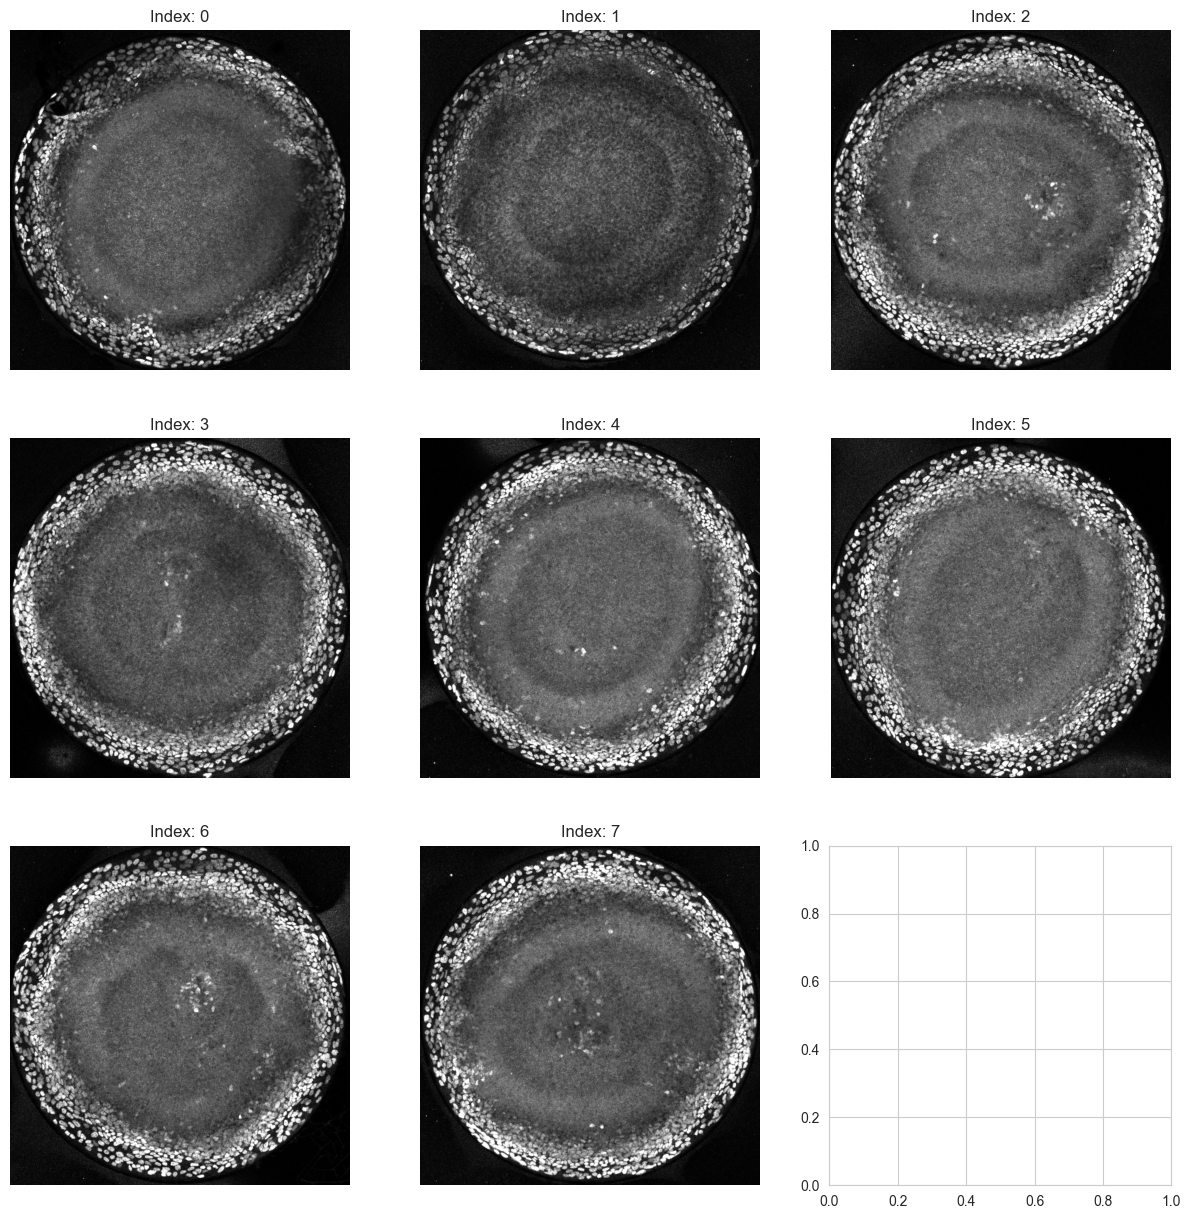

In [25]:
channel = 0
fig, ax = plot_images(cur_images, channel, fig_size=(15, 15))

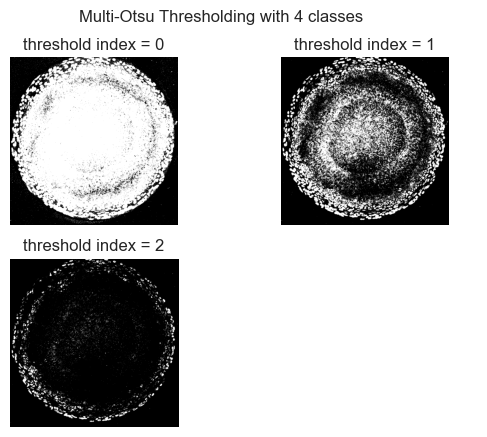

In [26]:
plot_multi_otsu_thresholds(cur_images[1], channel, 4)

In [27]:
index_to_exclude = [2, 3, 6, 7]
cur_images = delete_from_list(cur_images, index_to_exclude)
cur_file_indexes = delete_from_list(cur_file_indexes, index_to_exclude)

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        #   no positive signal
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

### Placode fate images (PAX6)

In [28]:
cur_file_indexes = string_list_locations(file_names, "placode_pax6")

stack1_index = set(cur_file_indexes).intersection(set(string_list_locations(file_names, "-1")))
stack2_index = set(cur_file_indexes) - set(stack1_index)
stack1_images = get_items_from_index(images, stack1_index)
stack2_images = get_items_from_index(images, stack2_index)

cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    np.array([stack1_images, stack2_images]).reshape((10, 2, 4, 1024, 1024))
))

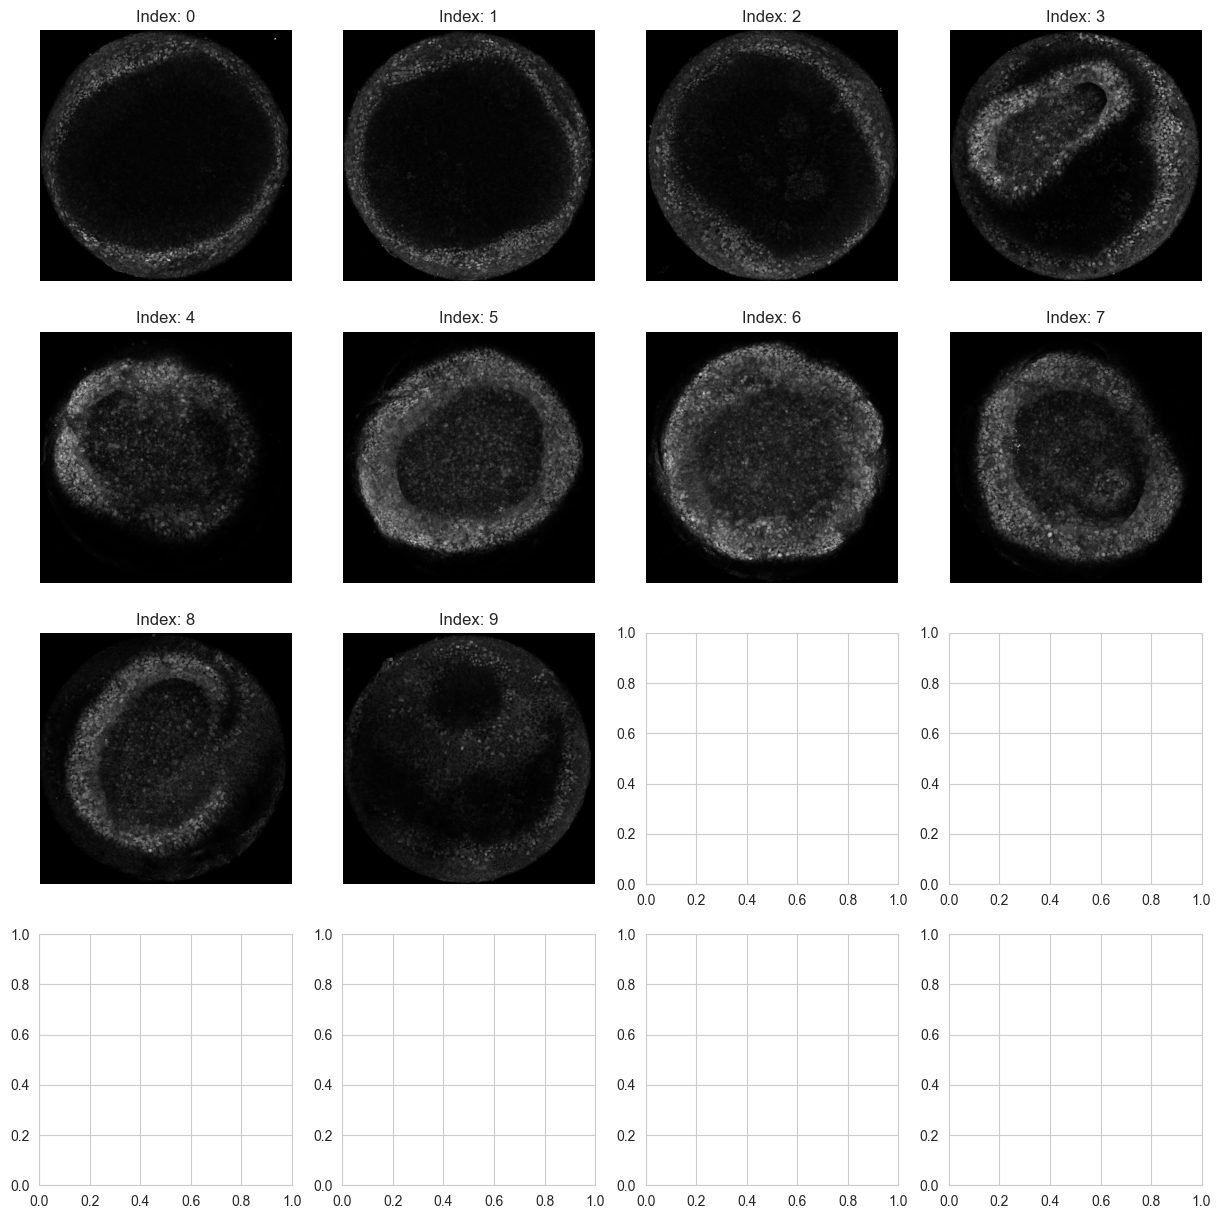

In [30]:
channel = 2
fig, ax = plot_images(cur_images, channel, fig_size=(15, 15))

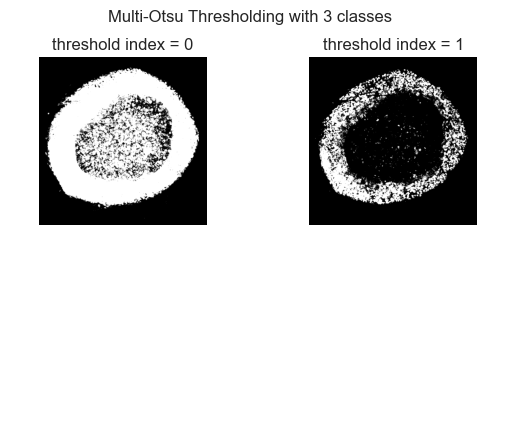

In [31]:
plot_multi_otsu_thresholds(cur_images[5], channel, 3)

In [32]:
index_to_exclude = [3, 4, 5, 6, 7, 8, 9]
cur_images = delete_from_list(cur_images, index_to_exclude)
cur_file_indexes = delete_from_list(stack1_index, index_to_exclude)

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        #   no positive signal
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3, threshold_index=0)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

### Placode fate images (SIX1)

In [33]:
cur_file_indexes = string_list_locations(file_names, "placode_six1")

stack1_index = set(cur_file_indexes).intersection(set(string_list_locations(file_names, "-1")))
stack2_index = set(cur_file_indexes) - set(stack1_index)
stack1_images = get_items_from_index(images, stack1_index)
stack2_images = get_items_from_index(images, stack2_index)

cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    np.array([stack1_images, stack2_images]).reshape((7, 2, 4, 1024, 1024))
))

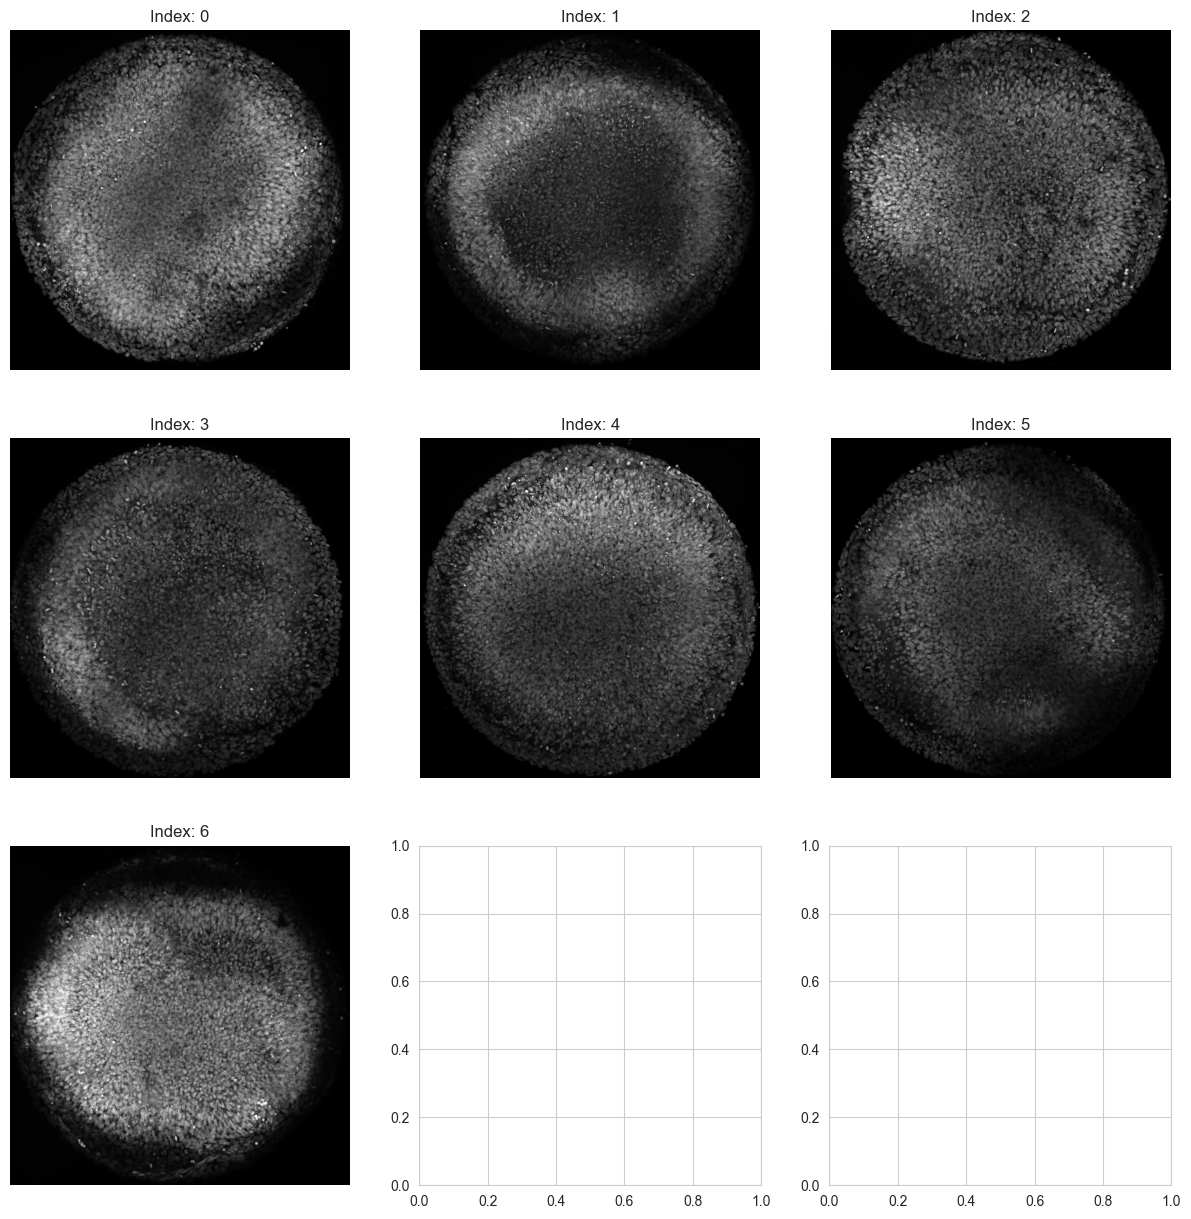

In [34]:
channel = 3
fig, ax = plot_images(cur_images, channel, fig_size=(15, 15))

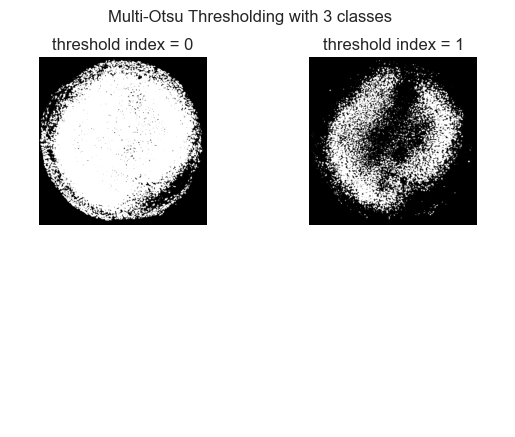

In [35]:
plot_multi_otsu_thresholds(cur_images[0], channel, 3)

In [36]:
index_to_exclude = [1, 5, 6]
cur_images = delete_from_list(cur_images, index_to_exclude)
cur_file_indexes = delete_from_list(stack1_index, index_to_exclude)

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        #   no positive signal
        lambda f: apply_multiotsu_to_channel(f, 2)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

## Image Processing

In [37]:
def gen_channel_names(file):
    if "Day6" in file:
        file_params = os.path.basename(file).split("Day6")[1].split("_")
        channel_names = file_params[1:8][::2]
    elif "day" in file:
        file_params = os.path.basename(file).split("day")[1].split("_")
        channel_names = file_params[2:9][::2]
    channel_names_raw = list(map(lambda x: x.upper(), channel_names))
    channel_names_final = channel_names_raw[:-1][::-1]
    channel_names_final.append(channel_names_raw[-1])
    return channel_names_final


def get_condition(file):
    file_params = os.path.basename(file).split("_")
    if "crest" in file_params:
        return f'{file_params[0]} {file_params[1]}'
    elif "neural" in file_params:
        return file_params[0]
    else:
        return file_params[1]

In [38]:
df = []

for file, img in zip(file_names_new, images_new):
    df_mini = generate_data_frame(
        expand_coordinate_matrix(img[dapi_num]),
        img,
        gen_channel_names(file),
        Distances=get_distances(img[dapi_num])
    )
    df_mini = scale_distances(df_mini, file=file)
    df_mini = average_distances(df_mini)
    df_mini = smooth_distances(df_mini, gen_channel_names(file))
    df_mini["Condition"] = np.repeat(get_condition(file), df_mini.shape[0])
    df_mini["Staining"] = np.repeat(gen_channel_names(file)[2], df_mini.shape[0])
    df.append(df_mini)

df = pd.concat(df)

## Analysis

In [85]:
df_long = pd.melt(df, id_vars=["Staining", "Distances", "Condition"],
                  value_vars=["PAX6", "SOX10", "ISL12", "SIX1", "DAPI"]).reset_index()
df_long = df_long.groupby(["Condition", "Staining", "Distances", "variable"]).mean()
df_long.reset_index(inplace=True)

In [86]:
def normalize_df(data, fil):
    for f in fil:
        data_filter = (
                (data["Condition"] == f[0]) &
                (data["Staining"] == f[1]) &
                (data["variable"] == f[2])
        )
        cur_data = data.loc[data_filter, "value"]
        data.loc[data_filter, "value"] = gaussian_filter(cur_data, 10)
        data.loc[data_filter, "value"] = ((cur_data - cur_data.min()) /
                                          (cur_data.max() - cur_data.min()))
    return data

In [100]:
data_filter = np.column_stack((
    np.repeat(np.array([["fates", ], ["neural", ], ["neural crest", ], ["placode", ]]), [5, 10, 10, 10], axis=0),
    np.delete(np.tile(np.repeat(np.array([["PAX6", ], ["SIX1", ]]), 5), 4), np.s_[4:9]),
    np.delete(np.tile(["ISL12", "SOX10", "PAX6", "SIX1", "DAPI"], 8), np.s_[4:9])
))
normalize_df(df_long, data_filter)

Condition Staining   Distances variable          index     value
0         fates     PAX6    0.000000     DAPI   83627.666667  0.012252
1         fates     PAX6    0.000000    ISL12   42183.666667  0.057597
2         fates     PAX6    0.000000     PAX6     739.666667  0.622007
3         fates     PAX6    0.000000     SIX1   62905.666667       NaN
4         fates     PAX6    0.000000    SOX10   21461.666667  0.024684
...         ...      ...         ...      ...            ...       ...
26300   placode     SIX1  528.602662     DAPI  103609.000000  0.000000
26301   placode     SIX1  528.602662    ISL12   62165.000000  0.000000
26302   placode     SIX1  528.602662     PAX6   20721.000000       NaN
26303   placode     SIX1  528.602662     SIX1   82887.000000  0.000000
26304   placode     SIX1  528.602662    SOX10   41443.000000  0.000000

[26305 rows x 6 columns]

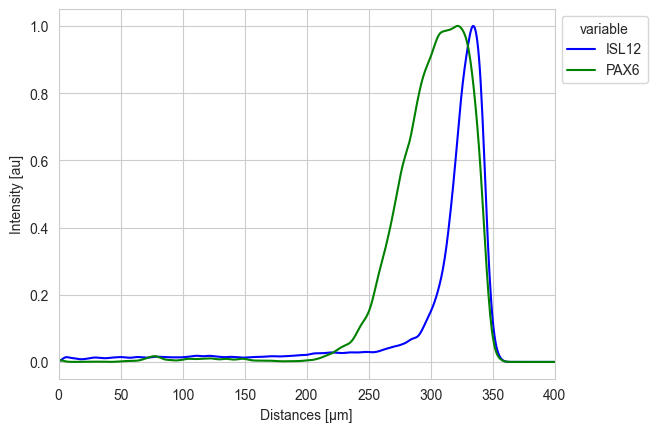

In [101]:
data = df_long.loc[
    (df_long["Staining"] == "PAX6") &
    (df_long["Condition"].isin(["placode"])) &
    (df_long["variable"].isin(["PAX6", "ISL12"]))
    ]
g = sns.lineplot(data=data,
                 x="Distances",
                 y="value",
                 hue="variable",
                 #style="Condition",
                 palette=["b", "g"])
g.set_xlabel("Distances [µm]")
g.set_ylabel("Intensity [au]")
g.set_xlim((0, 400))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

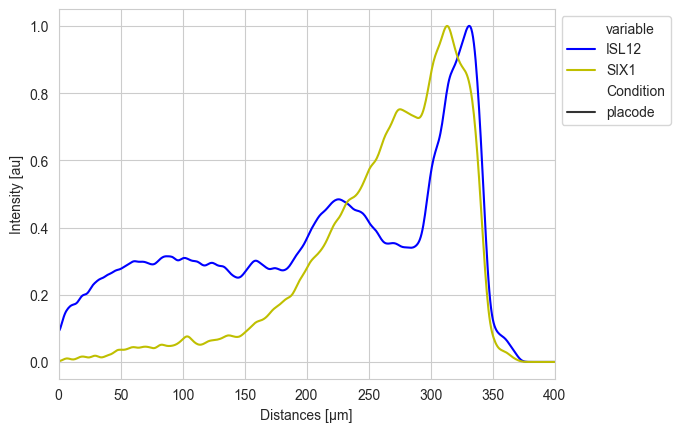

In [84]:
data = df_long.loc[
    (df_long["Staining"] == "SIX1") &
    (df_long["Condition"].isin(["placode"])) &
    (df_long["variable"].isin(["SIX1", "ISL12"]))
    ]
g = sns.lineplot(data=data,
                 x="Distances",
                 y="value",
                 hue="variable",
                 style="Condition",
                 palette=["b", "y"])
g.set_xlabel("Distances [µm]")
g.set_ylabel("Intensity [au]")
g.set_xlim((0, 400))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

Empty DataFrame
Columns: [Condition, Staining, Distances, variable, index, value]
Index: []